<a href="https://colab.research.google.com/github/Sweta-Das/CODSOFT/blob/main/codsoft_task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
car_df = pd.read_csv('drive/MyDrive/Colab Notebooks/CODSOFT/car_purchasing.csv', encoding='ISO-8859-1')
adv_df = pd.read_csv('drive/MyDrive/Colab Notebooks/CODSOFT/advertising.csv')

In [4]:
car_df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


car purchase amount = overall amount that consumers would spend to purchase car

In [5]:
adv_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [7]:
adv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
car_df.nunique()

customer name          498
customer e-mail        500
country                211
gender                   2
age                    500
annual Salary          500
credit card debt       500
net worth              500
car purchase amount    500
dtype: int64

In [9]:
car_df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [10]:
adv_df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
car_df.duplicated().sum()

0

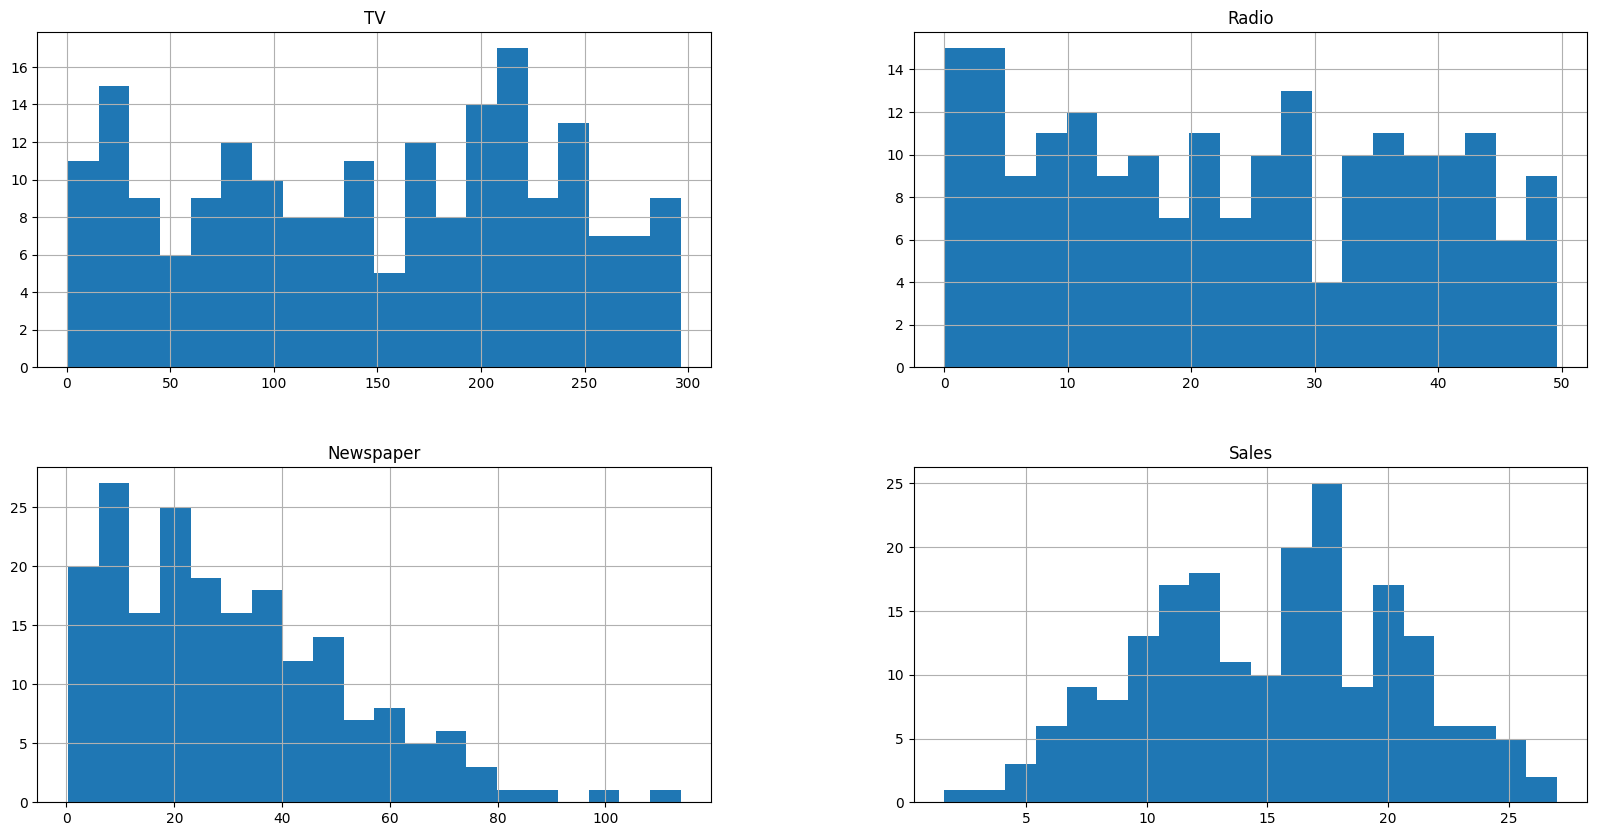

In [12]:
import matplotlib.pyplot as plt

adv_df.hist(bins=20, figsize= (20, 10))
plt.show()

These graphs show that TV and radio are continuously used for ads but, newspaper is only used at the initial phase of ad of car while reduced afterwise.

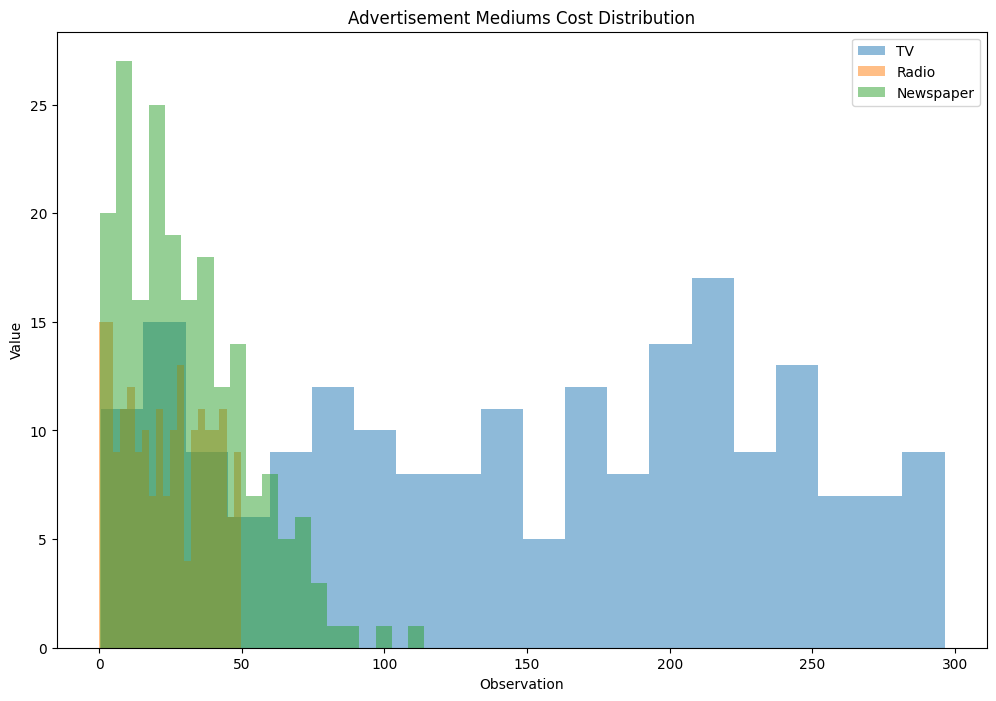

In [13]:
plt.figure(figsize=(12,8))

for medium in ['TV', 'Radio', 'Newspaper']:
  plt.hist(adv_df[medium], bins = 20, alpha = 0.5, label = medium)

plt.title('Advertisement Mediums Cost Distribution')
plt.xlabel('Observation')
plt.ylabel('Value')
plt.legend()
plt.show()

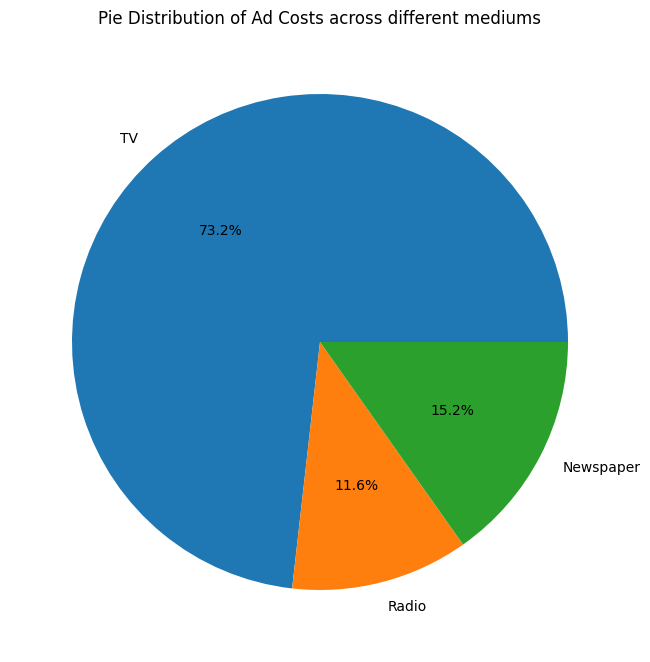

In [14]:
total_costs = adv_df[['TV', 'Radio', 'Newspaper']].sum()

plt.figure(figsize = (8, 10))
plt.pie(total_costs, labels = total_costs.index, autopct = '%1.1f%%')
plt.title('Pie Distribution of Ad Costs across different mediums')
plt.show()

For advertisement platform selection, TV seems the obvious choice as its value remains consistent.

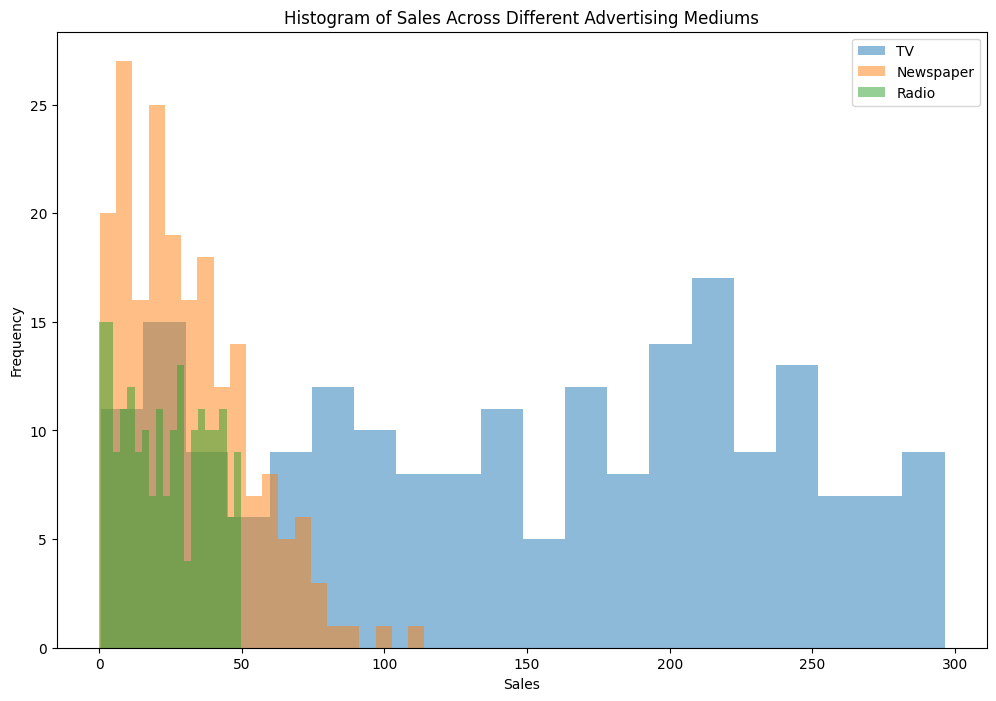

In [15]:
plt.figure(figsize=(12, 8))

# Histogram for sales across different advertising mediums
for medium in ['TV', 'Newspaper', 'Radio']:
    plt.hist(adv_df[medium], bins=20, alpha=0.5, label=medium)

plt.title('Histogram of Sales Across Different Advertising Mediums')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend()
plt.show()

On the basis of advertising expense as well, TV though expensive remains consistent and sales are regular on TV while newspaper and radio are cheap, their sales decreases w.r.t time.

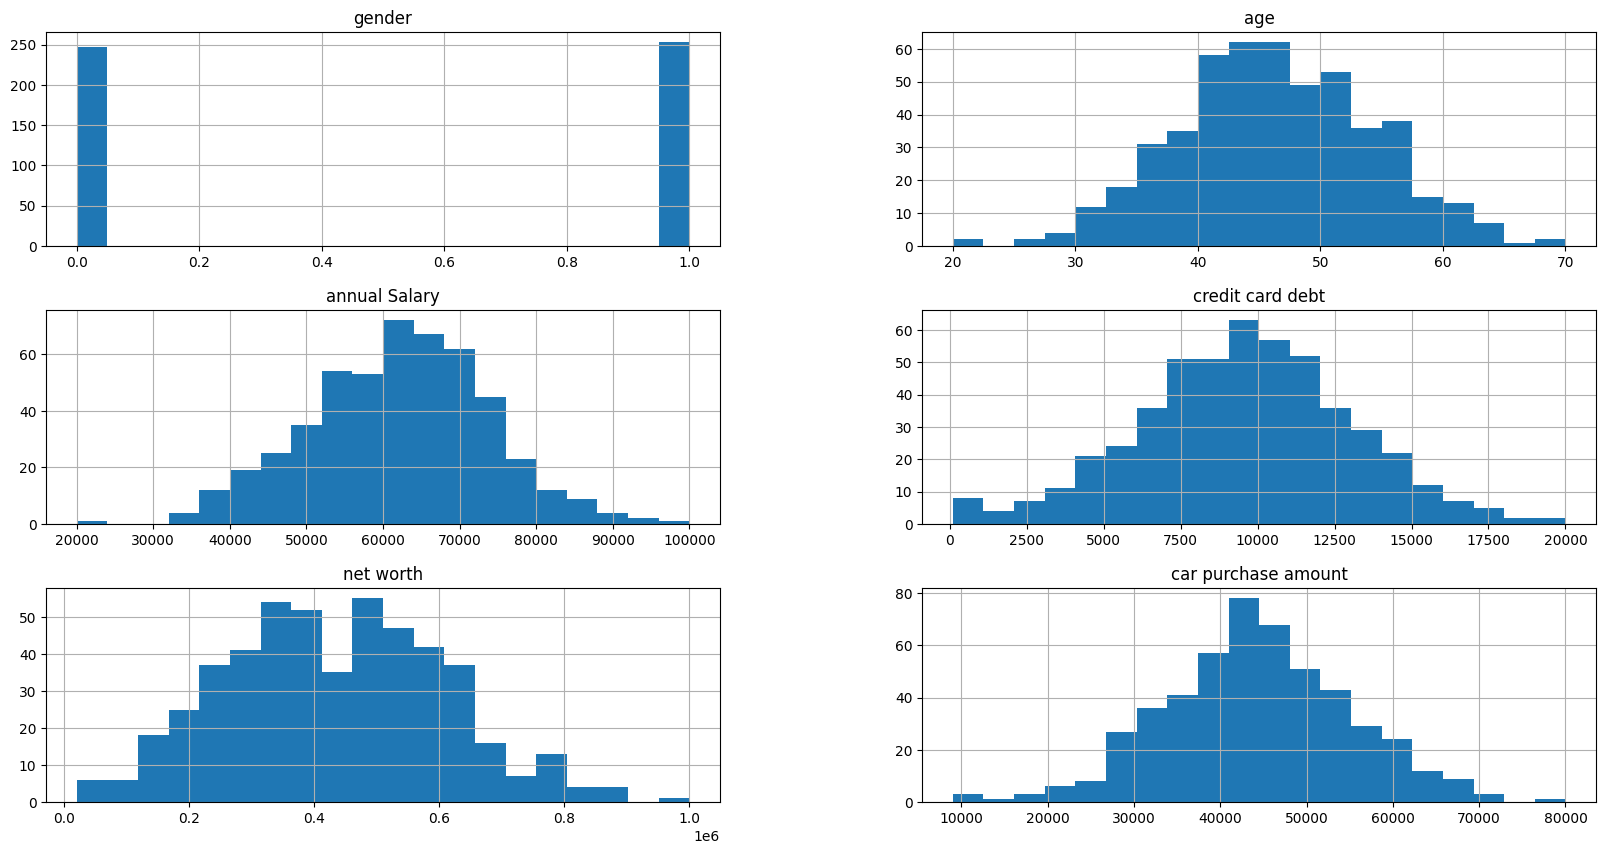

In [16]:
import matplotlib.pyplot as plt

car_df.hist(bins=20, figsize= (20, 10))
plt.show()

Based on the customer dataset, mostly the customers belong to the age group of 40-50, most of their annual salary is between USD52000-75000, their credit card debt ranges mostly from UsD 7000-12000, and the car price ranges from USD 38000-50000.

No. of unique countries: 211


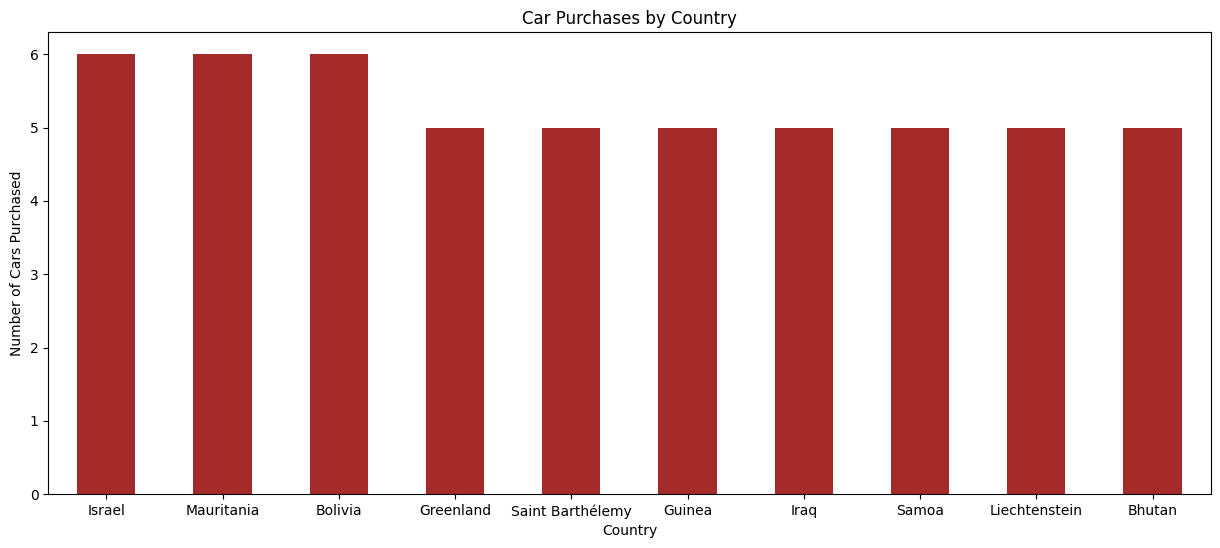

In [17]:
# Plotting histogram to show top 10 countries where customers buy more cars
print('No. of unique countries:', car_df['country'].nunique())

plt.figure(figsize=(15, 6))
car_df['country'].value_counts().nlargest(10).plot(kind='bar', color='brown')
plt.title('Car Purchases by Country')
plt.xlabel('Country')
plt.ylabel('Number of Cars Purchased')
plt.xticks(rotation=0)
plt.show()

Among 211 unique countries present in the dataset, most of the cars are purchased in Israel, Mauritania and Bolivia.

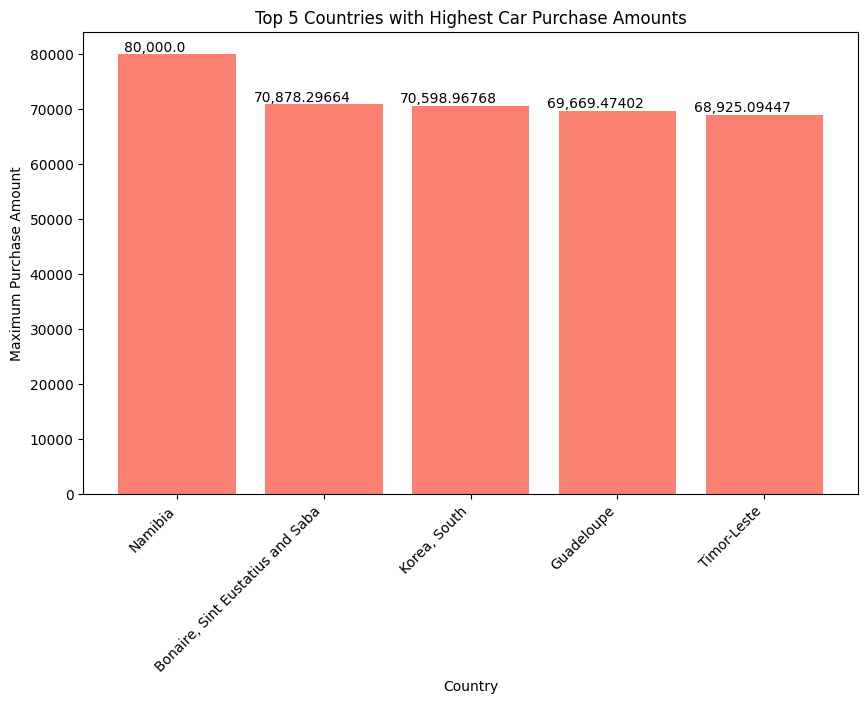

In [19]:
# Plotting to show the 5 countries with the highest car purchase amounts
ctry = car_df.groupby('country')['car purchase amount'].max().nlargest(5)

plt.figure(figsize=(10, 6))
bars = plt.bar(ctry.index, ctry, color='salmon')

# Displaying purchase amounts on bars
for bar, amount in zip(bars, ctry):
  plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 500, f'{amount:,}', ha='center', color='black')

plt.title('Top 5 Countries with Highest Car Purchase Amounts')
plt.xlabel('Country')
plt.ylabel('Maximum Purchase Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

In [20]:
print(type(car_df['age']))

<class 'pandas.core.series.Series'>


In [21]:
car_df['age'] = car_df['age'].astype(int)
print(type(car_df['age']))

<class 'pandas.core.series.Series'>


### Customer Segmentation based on their age and car purchasing behavior

In [24]:
# Creating age range dynamically
bin_size = 10
max_age = car_df['age'].max()
# print(max_age)
age_bins = list(range(0, int(max_age) + bin_size, bin_size))
print(age_bins)

[0, 10, 20, 30, 40, 50, 60, 70]


In [27]:
# Creating labels for the age ranges
age_labels = [f"{start} - {start + bin_size}" for start in age_bins[:-1]]
print(age_labels)

['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70']


In [31]:
# Adding age range column in the dataset
car_df['age_range'] = pd.cut(car_df['age'], bins = age_bins, labels = age_labels, right = False)
car_df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount,age_range
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41,62812.09301,11609.380910,238961.2505,35321.45877,40 - 50
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40,66646.89292,9572.957136,530973.9078,45115.52566,40 - 50
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43,53798.55112,11160.355060,638467.1773,42925.70921,40 - 50
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58,79370.03798,14426.164850,548599.0524,67422.36313,50 - 60
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57,59729.15130,5358.712177,560304.0671,55915.46248,50 - 60


In [33]:
# Grouping by age range and calculating the mean purchase amount for each group
age_purchase_mean = car_df.groupby('age_range')['car purchase amount'].mean().reset_index()
print(age_purchase_mean)

  age_range  car purchase amount
0    0 - 10                  NaN
1   10 - 20                  NaN
2   20 - 30         26615.206629
3   30 - 40         35268.386125
4   40 - 50         43137.498874
5   50 - 60         51064.837759
6   60 - 70         56091.557900


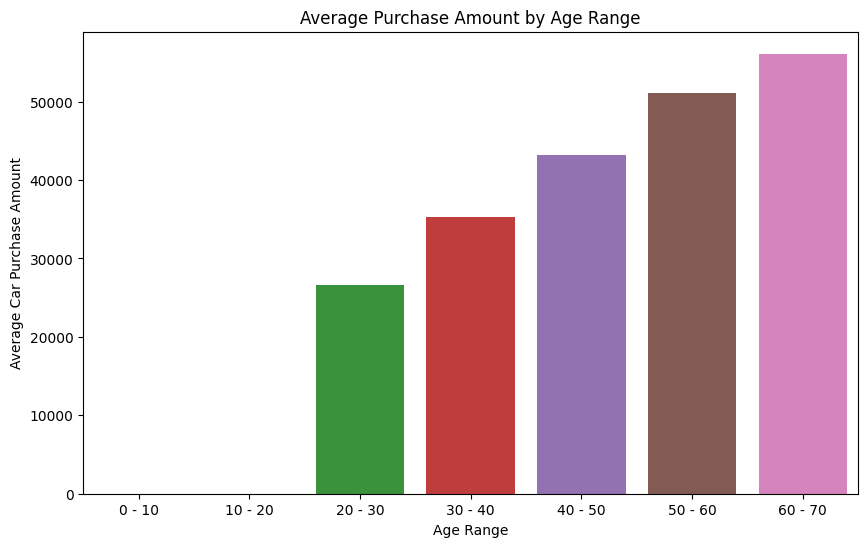

In [36]:
# Plotting the results
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the results using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='age_range', y='car purchase amount', data=age_purchase_mean)
plt.title('Average Purchase Amount by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Average Car Purchase Amount')
plt.show()

This shows that mostly elderly people buy cars from the age range of 60-70 years.

In [37]:
# Finding age range of customers with max. net worth
age_worth_mean = car_df.groupby('age_range')['net worth'].mean().reset_index()
print(age_worth_mean)

  age_range      net worth
0    0 - 10            NaN
1   10 - 20            NaN
2   20 - 30  418071.657125
3   30 - 40  424482.815152
4   40 - 50  433948.906622
5   50 - 60  431648.664172
6   60 - 70  443639.563054


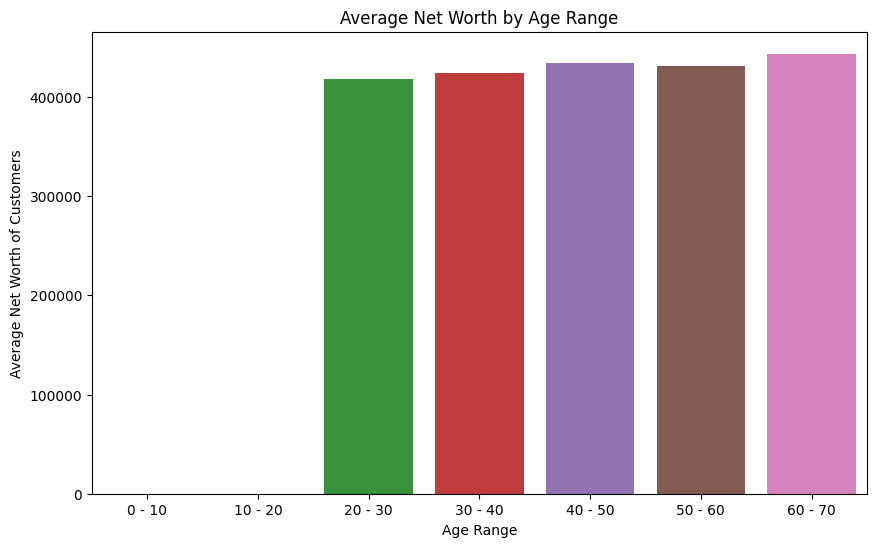

In [38]:
# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x='age_range', y='net worth', data=age_worth_mean)
plt.title('Average Net Worth by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Average Net Worth of Customers')
plt.show()

This shows that though customers have good net worth in their 20-30 and 30-40 age group, they're less likely to buy cars.

### Customer Segmentation based on Gender

In [45]:
gender_purchase_count = car_df['gender'].value_counts().reset_index()
print(gender_purchase_count)

   index  gender
0      1     253
1      0     247


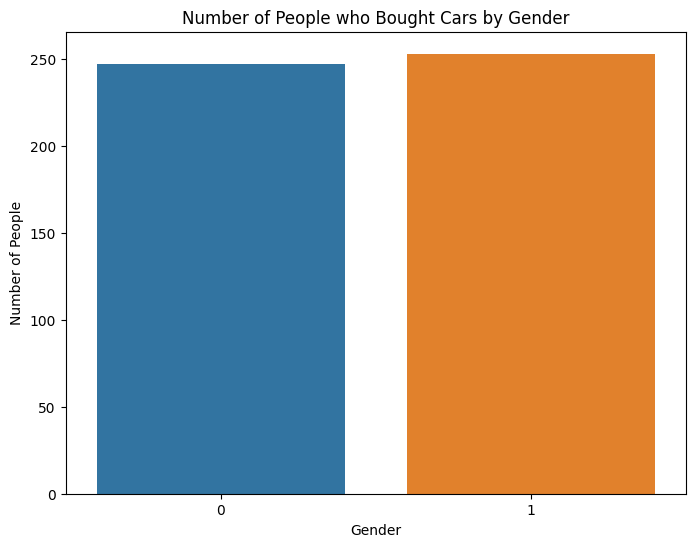

In [46]:
# Rename the columns for clarity
gender_purchase_count.columns = ['Gender', 'Number of People']

# Plotting the results
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Number of People', data=gender_purchase_count)
plt.title('Number of People who Bought Cars by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.show()

This shows that females are more likely to purchase cars.

### Customer Segmentation based on their income range and car purchasing behavior

In [58]:
# Finding highest and lowest income
print(car_df['annual Salary'].max())
print(car_df['annual Salary'].min())

100000.0
20000.0


In [59]:
# Defining income ranges
low_income_range = (car_df['annual Salary'].min(), 40000)
middle_income_range  = (40001, 70000)
high_income_range = (70001, car_df['annual Salary'].max())
print(low_income_range, middle_income_range, high_income_range)

(20000.0, 40000) (40001, 70000) (70001, 100000.0)


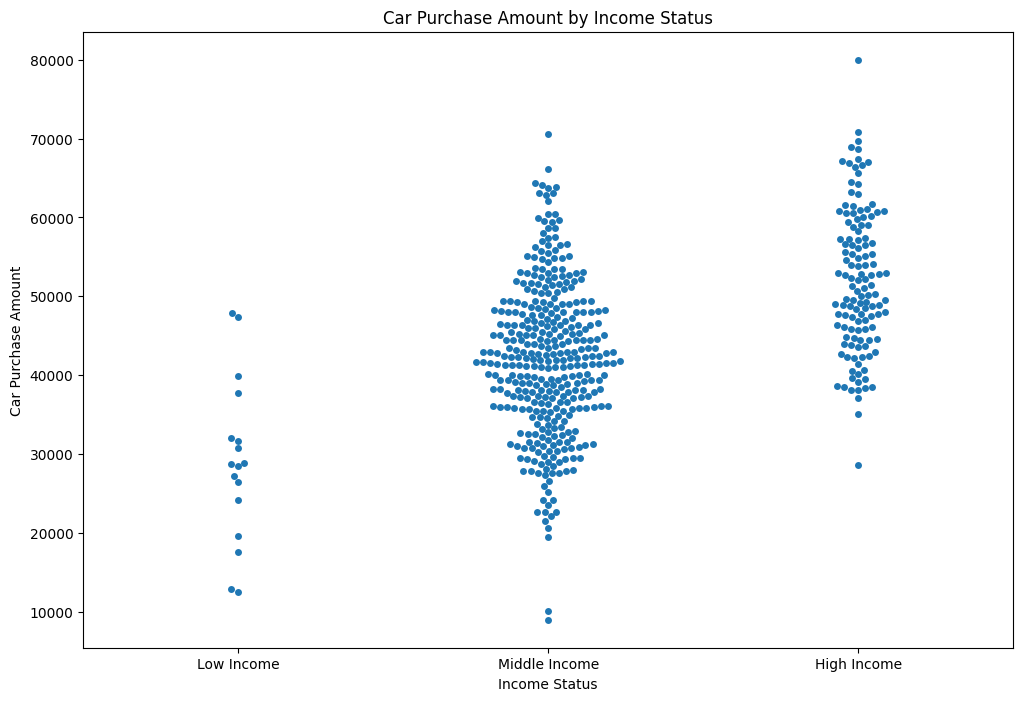

In [69]:
# Plotting the results
car_df['IncomeStatus'] = pd.cut(car_df['annual Salary'],
                                bins=[low_income_range[0], middle_income_range[0], high_income_range[0], high_income_range[1]],
                                labels=['Low Income', 'Middle Income', 'High Income'], right=False)
# print(car_df.head())
plt.figure(figsize=(12, 8))
sns.swarmplot(x='IncomeStatus', y='car purchase amount', data=car_df, order=['Low Income', 'Middle Income', 'High Income'])
plt.title('Car Purchase Amount by Income Status')
plt.xlabel('Income Status')
plt.ylabel('Car Purchase Amount')
plt.show()

Mostly middle income status of people (40000-70000) tend to purchase cars.

### Customer Segmentation based on their Financial Stability

In [80]:
print(car_df['credit card debt'].min(), car_df['credit card debt'].max())
print(car_df['net worth'].min(), car_df['net worth'].max())
print(car_df['credit card debt'].mean())
print(car_df['credit card debt'].mean())

100.0 20000.0
20000.0 1000000.0
9607.645048629198
9607.645048629198


In [108]:
low_debt_high_net_worth = (car_df['credit card debt'] <= 5000.0) & (car_df['net worth'] >= 80000.0)
high_debt_low_net_worth = (car_df['credit card debt'] > 16000.0) & (car_df['net worth'] <= 40000.0)
balanced_worth = (
    (car_df['credit card debt']>6000.0) & (car_df['credit card debt'] <= 16000.0) &
    (car_df['net worth'] > 40000.0) & (car_df['net worth'] <= 1000000)
    )

# Creating a new column 'Financial Segment'
# car_df['Financial Segment'] = 'Other'
car_df.loc[low_debt_high_net_worth, 'Financial Segment'] = 'Low Debt, High Net Worth'
car_df.loc[high_debt_low_net_worth, 'Financial Segment'] = 'High Debt, Low Net Worth'
car_df.loc[balanced_worth, 'Financial Segment'] = 'Balanced Worth'

In [ ]:
car_df.head()

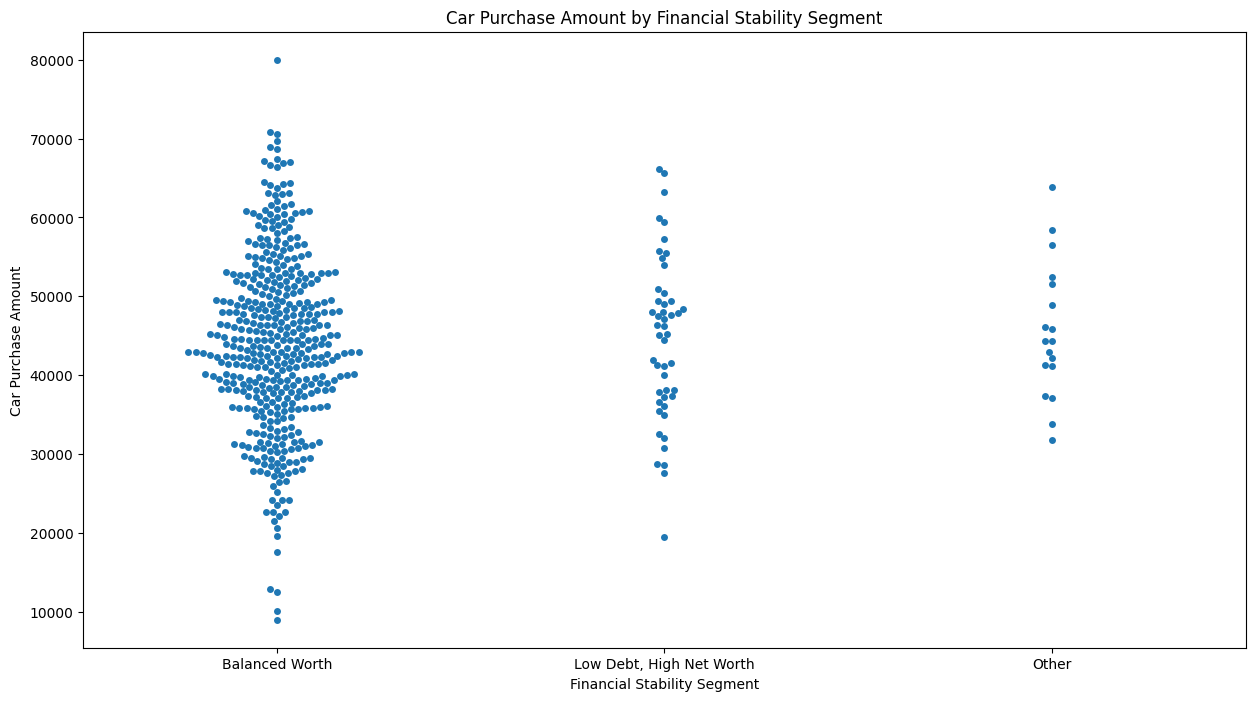

In [109]:
# Plot the results using seaborn
plt.figure(figsize=(15, 8))
sns.swarmplot(x='Financial Segment', y='car purchase amount', data=car_df)
plt.title('Car Purchase Amount by Financial Stability Segment')
plt.xlabel('Financial Stability Segment')
plt.ylabel('Car Purchase Amount')
plt.show()

### Using K-Means Clustering to Cluster customers based on annual salary, credit card debt, net worth and car purchase amount.

In [48]:
# Selecting attributes for clustering
data_cluster = car_df[['annual Salary', 'credit card debt', 'net worth', 'car purchase amount']]

In [55]:
from sklearn.cluster import KMeans

# num_clusters = 5
kmeans = KMeans(n_clusters = 3, random_state = 42)
car_df['Cluster'] = kmeans.fit_predict(data_cluster)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [56]:
car_df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount,age_range,Cluster
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41,62812.09301,11609.380910,238961.2505,35321.45877,40 - 50,2
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40,66646.89292,9572.957136,530973.9078,45115.52566,40 - 50,0
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43,53798.55112,11160.355060,638467.1773,42925.70921,40 - 50,1
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58,79370.03798,14426.164850,548599.0524,67422.36313,50 - 60,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57,59729.15130,5358.712177,560304.0671,55915.46248,50 - 60,1


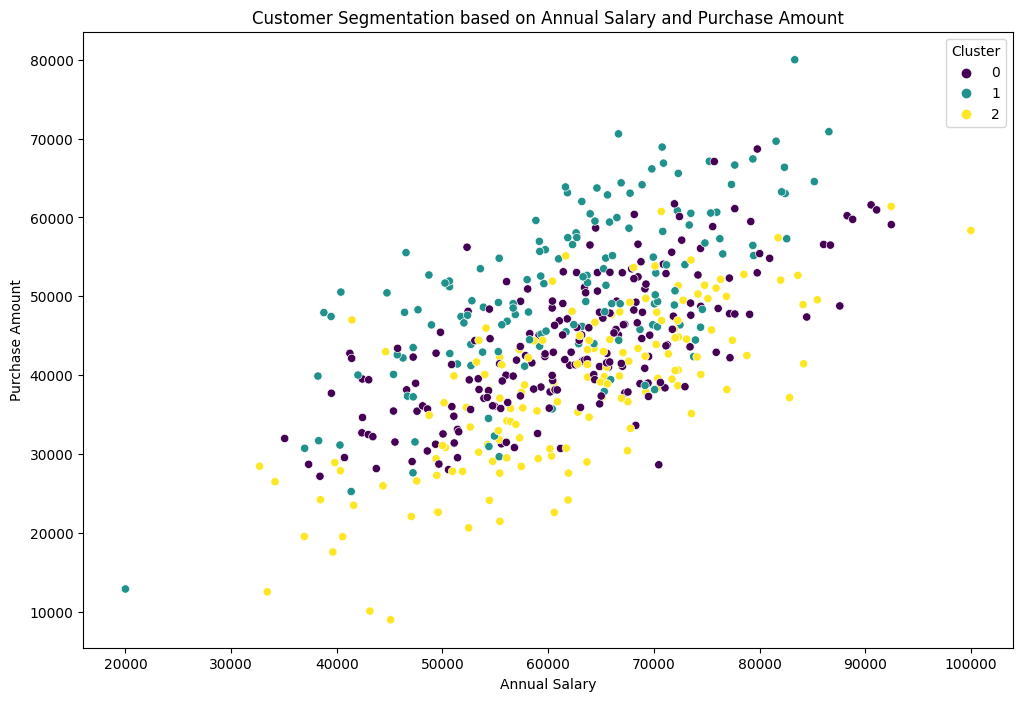

In [57]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='annual Salary', y = 'car purchase amount', hue='Cluster', data = car_df, palette = 'viridis')
plt.title('Customer Segmentation based on Annual Salary and Purchase Amount')
plt.xlabel('Annual Salary')
plt.ylabel('Purchase Amount')
plt.show()